#Lab 1: Introduction to ScikitLearn and Classification Tasks

During this Lab, we aim to achieve the following:


*   Familiarize with <a href="https://scikit-learn.org/stable/"> scikit-learn </a>, an essential python library in data science;
*   learn how to approach a classification task with scikit-learn.

In this notebook, we learn to use Scikit-Learn with a practical example and then, in the second part, we will test our knowledge by doing some exercises.



# Part 1: A Classification Example With Scikit-Learn

We start our lab by implementing *Logistic Regression* using  scikit-learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

[[ -4.89287606  -2.66252415]
 [  1.53513244 -17.71701488]
 [  2.5182605   -1.84224519]
 [  2.44773955   1.22644053]
 [  0.26080952 -10.3608732 ]
 [ -4.93419853 -11.87491308]
 [-11.14091064  -9.02493302]
 [ -3.84650002  -3.26967085]
 [  1.72390928   0.94676316]
 [  0.22019842  -3.97495822]
 [ -9.5434103   -9.29414049]
 [ -8.84586911  -2.47017747]
 [ -3.15198613  -3.10866018]
 [  8.04758892  -3.1059307 ]
 [  4.51512226  -5.69626898]
 [  1.48372716  -4.72320859]
 [ -1.24619567  -0.08046855]
 [ -2.59060124  -7.7649853 ]
 [  1.97108005   0.72102173]
 [ -4.10939125 -13.24348766]
 [  1.15603709  -9.46665443]
 [  4.52015465   1.10731538]
 [  0.73655564  -8.96913345]
 [  5.58087117   0.20618247]
 [  3.07191791  -2.64967086]
 [  1.49878533   1.77028153]
 [  1.76912283  -3.97549865]
 [ -5.72999469  -3.06430279]
 [ -1.48573418  -2.71616512]
 [  0.75656778 -14.52489211]
 [  0.39325343   4.78726736]
 [  4.3525562    1.26046682]
 [  5.17701727  -2.62601201]
 [ -8.54351608 -12.89055219]
 [  5.22743541

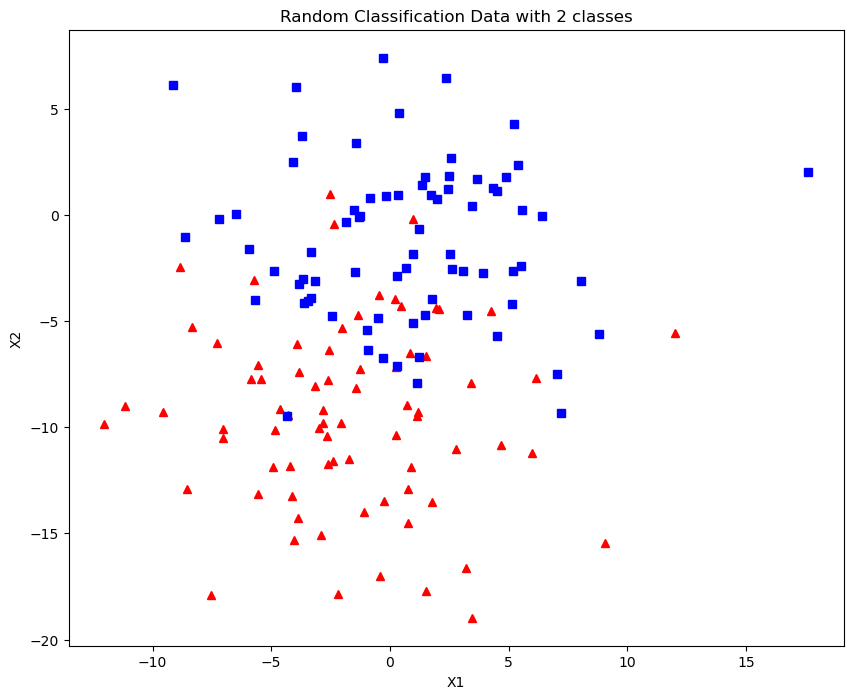

In [3]:
from collections import Counter

X_toy, y_toy = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=4.05,
                           random_state=2) # create an artificial dataset
print(X_toy)
print(y_toy)

print(Counter(y_toy))

#Plotting the data
fig = plt.figure(figsize=(10,8))
plt.plot(X_toy[:, 0][y_toy == 0], X_toy[:, 1][y_toy == 0], 'r^')
plt.plot(X_toy[:, 0][y_toy == 1], X_toy[:, 1][y_toy == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')
plt.show()


We can now define our classifier: logistic regression <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> [link] </a>.

In [4]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression() # options for the classifiers are passed as parameters to constructor of the class
                              # LogisticRegression(). Either visit the link or put the cursor over it to see them


Sklearn defines standard functions for models, like *fit* and *predict*.

In [5]:
#train phase
clf_lr.fit(X_toy, y_toy)


#estimation (y_hat)
y_pred_cl_lr = clf_lr.predict(X_toy)

print(y_pred_cl_lr)

[1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 1]


How to evaluate our models' performance? <br>
Scikit-learn offers a broad set of evaluation functions already implemented <a href = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics">[link]</a>.

In [6]:
from sklearn.metrics import accuracy_score

print(f"Logistic Regression -- Toy dataset.\tACC: {accuracy_score(y_toy, y_pred_cl_lr)}")


Logistic Regression -- Toy dataset.	ACC: 0.8466666666666667


In [7]:
# printing the values of the parameters after learning

print(clf_lr.coef_[0])


[0.13964848 0.50949748]


## Model Selection
When defining or training a model, we have the so called *hyperparameters*, i.e., different settings to configure for our training strategy.  <br>
The question is: *how can we decide the best configuration setting for the task?* <br>
The answer is the usage of *training* and *validation* partitions. <br>
We can use sklearn to do that: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_toy, y_toy,
                                                  train_size = 0.8, shuffle=False, random_state=42)

print(f"Original size = {X_toy.shape[0]}\tTrain size = {X_train.shape[0]}\tVal size = {X_val.shape[0]}")  # alternative way to use the print when there are
                                                                                                          # variables and text to print together


Original size = 150	Train size = 120	Val size = 30


First we use Scikit-Learn to train a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a> classifier with default parameters over the Toy dataset. <br>
We compute the accuracy on both training and validation sets.


In [9]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

#estimation (y_hat)
y_train_pred_lr = clf_lr.predict(X_train)
y_val_pred_lr = clf_lr.predict(X_val)

print(f"Logistic Regression.\tTrain ACC: {accuracy_score(y_train, y_train_pred_lr)}")
print(f"Logistic Regression.\tVal ACC: {accuracy_score(y_val, y_val_pred_lr)}")

Logistic Regression.	Train ACC: 0.8416666666666667
Logistic Regression.	Val ACC: 0.8666666666666667


### Model Selection with Logistic Regression

Logistic Regression has a hyperparameter *C*. Lower values of C correspond to simpler models (with the risk of underfitting), higher values of C correspond to complex models (with the risk of overfitting).  
Let's see how the performance change by varying it.

Let's find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10]$.

In [10]:
C = [0.001, 0.01, 0.1, 1., 10, 100]
for c in C:
    clf_lr = LogisticRegression(C = c)
    clf_lr.fit(X_train, y_train)

    #estimation (y_hat)
    y_train_pred_lr = clf_lr.predict(X_train)
    y_val_pred_lr = clf_lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)

    print(f"LR. C= {c}.\tTrain ACC: {tr_acc}\tVal Acc: {val_acc}")

LR. C= 0.001.	Train ACC: 0.8416666666666667	Val Acc: 0.9
LR. C= 0.01.	Train ACC: 0.8416666666666667	Val Acc: 0.9
LR. C= 0.1.	Train ACC: 0.8416666666666667	Val Acc: 0.8666666666666667
LR. C= 1.0.	Train ACC: 0.8416666666666667	Val Acc: 0.8666666666666667
LR. C= 10.	Train ACC: 0.8416666666666667	Val Acc: 0.8666666666666667
LR. C= 100.	Train ACC: 0.8416666666666667	Val Acc: 0.8666666666666667


### Exercise: Model Selection with Logistic Regression


We ask you again to work on a classification task. <br>
This time, the classification is more challenging.
The dataset is called *sonar*.

In [11]:
import pandas as pd
import random
random.seed(42)

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
ds = pd.read_csv(url, header = None)

# split into input and output elements
data = ds.values
random.shuffle(data)
X_sonar, y_sonar = data[:, :-1], data[:, -1]

print(X_sonar.shape, y_sonar.shape)


(208, 60) (208,)


It's time to partition our dataset. <br>
We ask you to create three partitions:


*   *train set* : a set of samples used to train a model.
*   *val set*: a set of samples used to decide the best model.
*   *test set*: a set of samples used to see our best model performance.

We now first split samples that we can use in our training (train and val), from samples that we cannot touch (test). <br>
**EX 1** Create a split between train_val and test, by maintaining the 25% of samples in the test set.

In [12]:
#
# Ex 1: complete here
X_train_val, X_test, y_train_val, y_test= train_test_split(X_sonar, y_sonar, train_size=0.75, shuffle=False, random_state=42)
print(f"Original size: {X_sonar.shape[0]}\tTrain Validation size: {X_train_val.shape[0]}\tTest size: {X_test.shape[0]}")
#


Original size: 208	Train Validation size: 156	Test size: 52


**EX 1.2** From the train_val variables, split train and validation sets. Maintain the 10% of samples in the validation.


In [13]:
#
# Ex 1.2: complete here
X_train, X_val, y_train, y_val=train_test_split(X_train_val, y_train_val, train_size=0.9, shuffle=False, random_state=42)
print(f"Train size: {X_train.shape[0]}\tTest size: {X_val.shape[0]}")
#


Train size: 140	Test size: 16


In [14]:
print(X_train.shape, X_val.shape, X_test.shape)

(140, 60) (16, 60) (52, 60)


**EX 2** Train and evaluate (using accuracy) a logistic regression with the default value for the hyperparameter. Do the evaluation **only** on the training and validation partitions.

In [15]:
#
# Ex 2: complete here
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pre_lr = lr.predict(X_train)
y_val_pre_lr = lr.predict(X_val)

print(f"Logistic Resgression.\tTrain ACC: {accuracy_score(y_train, y_train_pre_lr)}")
print(f"Logistic Regression.\tValidation ACC: {accuracy_score(y_val, y_val_pre_lr)}")
#

Logistic Resgression.	Train ACC: 0.9428571428571428
Logistic Regression.	Validation ACC: 0.8125


Let's find the best value for *C*, an hyperparameter of the model. <br>
See the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> [link] </a>. <br>
**EX 3**  We ask you to find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10, 100, 1000, 10000]$.

In [16]:
#
# Ex 3: complete here
#
C = [0.001, 0.01, 0.1, 1., 10, 100, 1000, 10000]
for c in C:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    y_train_pre_lr = lr.predict(X_train)
    y_val_pre_lr = lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pre_lr)
    val_acc= accuracy_score(y_val, y_val_pre_lr)
    print(f"Logistic Regression. C={c}\tTrain ACC: {tr_acc}\tValidation ACC: {val_acc}")



Logistic Regression. C=0.001	Train ACC: 0.9428571428571428	Validation ACC: 0.8125
Logistic Regression. C=0.01	Train ACC: 0.9428571428571428	Validation ACC: 0.8125
Logistic Regression. C=0.1	Train ACC: 0.9428571428571428	Validation ACC: 0.8125
Logistic Regression. C=1.0	Train ACC: 0.9428571428571428	Validation ACC: 0.8125
Logistic Regression. C=10	Train ACC: 0.9571428571428572	Validation ACC: 0.8125
Logistic Regression. C=100	Train ACC: 0.9928571428571429	Validation ACC: 0.875
Logistic Regression. C=1000	Train ACC: 1.0	Validation ACC: 0.9375
Logistic Regression. C=10000	Train ACC: 1.0	Validation ACC: 0.9375


**Ex 4** It's time to see the performance on the test set of the best model, after training it on the training set. Use the accuracy as evaluation metric.

In [17]:
#
# Ex 4: complete here
#
lr = LogisticRegression(C= 100, max_iter= 1000)
lr.fit(X_train, y_train)
y_test_pre_lr = lr.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pre_lr)
print(f"Logistic Regression. C=100\tTest ACC: {test_acc}")

Logistic Regression. C=100	Test ACC: 0.7115384615384616


## Computing Vectorial Representations

In [55]:
!pip install spacy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.4/634.4 kB 9.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.2/774.2 kB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.0/175.0 kB 6.0 MB/s eta 0:00:00

[

In [56]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
!python -m spacy download "en_core_web_sm"
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document or the forth?',
]
Y = [1, 0, 0, 1]


vectorizer = CountVectorizer()
vectorizer.fit(corpus)            # extracts the vocabulary from corpus (the list of unique words in corpus)
X = vectorizer.transform(corpus)  # build the bag of words representation of corpus with respect to the vocabulary computed with fit on the previous row

print(vectorizer.get_feature_names_out())
print("vocabulary size:", len(vectorizer.get_feature_names_out()))

# Let's see some of the options of CountVectorizer (first we change the tokenizer)
nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

def spacy_tokenizer(text):
  return [token.text for token in nlp_en(text)]

vectorizer2 = CountVectorizer(binary=False, tokenizer=spacy_tokenizer)
X=vectorizer2.fit_transform(corpus)

print(vectorizer2.get_feature_names_out())
print("vocabulary size:", len(vectorizer2.get_feature_names_out()))

# now we can use X and Y in a learning algorithm


['and' 'document' 'first' 'forth' 'is' 'one' 'or' 'second' 'the' 'third'
 'this']
vocabulary size: 11
['.' '?' 'and' 'document' 'first' 'forth' 'is' 'one' 'or' 'second' 'the'
 'third' 'this']
vocabulary size: 13


/Users/goudarzimandanagmail.com/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Sentiment Analysis

The dataset is described here: https://www.aclweb.org/anthology/P04-1035.pdf

It is part of nltk, so it is convenient for us to use.

The goal of this exercise is to build a first machine learning model using the tools that we have seen so far: choose how to preprocess the text, create a bag of words feature representation, train a model using an ML method of your choice.

You need to use the following split for the data:

*   test: 30% of the documents
*   The rest of the documents will be split as
    *   train: 75% of the documents
    *   validation: 25% of the documents

After splitting the data, turn the reviews into vectors, then apply a ML algorithm. Use accuracy as evaluation measure.

In [20]:
import nltk
nltk.download('movie_reviews') # loads the dataset
nltk.download('punkt')
#!python -m spacy download "en_core_web_sm"


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/goudarzimandanagmail.com/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/goudarzimandanagmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the data
In the following I extract the raw content of the reviews (movie_reviews.raw()), i.e. each review is a string.
Another option is to use movie_reviews.words() that returns each review as a list of tokens. Feel free to use whichever best fit your needs.


In [21]:
from nltk.corpus import movie_reviews
import random
import spacy
from scipy.sparse import coo_matrix, vstack
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

documents = [(movie_reviews.raw(fileid), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

print("number of docs loaded:", len(documents))

corpus_raw = [ x[0] for x in documents ]  # corpus_raw is a list of strings (reviews) to be converted into vectors
y_corpus = [ x[1] for x in documents ]    # y_corpus are the sentiment labels of the reviews (nothing to be done here)
print(corpus_raw[0])
print(y_corpus[0])

random.seed(42)


number of docs loaded: 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an 

In [22]:
print(np.shape(corpus_raw))
print(np.shape(y_corpus))

(2000,)
(2000,)


## Exercise - Lab. 1 Assignment

Create a vectorial representation of the data, then apply a learning algorithm by optimising the hyperparameters on the validation set. If you need to use any function that depends on random number generators, use 42 as seed.
Test several representations. You may try functions of the libraries we have seen in class or make your own vectorial representation from scratch.
Once you have selected the best hyperparameters and preprocessing, retrain your model on the union of the training and validation sets, then compute the accuracy on the test set.

Report your test performance on Moodle. In Moodle you are also supposed to upload the notebook in .py format (Menu File->Download->Download .py)
In the file with your code motivate any significant choice you made and all different preprocessing you attempted (clearly highlight the best one, though).

**Bonus Exercise** for your best model, print the 30 tokens whose corresponding parameter have highest absolute value. What do you think of this list? Does it make sense? Are all tokens expected?


In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(corpus_raw)
X1 = vectorizer.transform(corpus_raw)
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['00' '000' '0009f' ... 'zwigoff' 'zycie' 'zzzzzzz']
39659


In [99]:
X1.shape

(2000, 39659)

In [32]:
nlp_en = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

def spacy_tokenizer(text):
    return [token.text for token in nlp_en(text)]
vectorizer2 = CountVectorizer(binary=False, tokenizer=spacy_tokenizer)
X2 = vectorizer2.fit_transform(corpus_raw)
print(vectorizer2.get_feature_names_out())
print(len(vectorizer2.get_feature_names_out()))

['\x05' '\n' '\n ' ... '|' '||' '}']
40111


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1, 2))
X3 = vectorizer.fit_transform(corpus_raw)
print("Number of features:", len(vectorizer.get_feature_names_out()))

Number of features: 494307


In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X3, y_corpus, train_size=0.75, shuffle=True, random_state=42)
print(f"Original size: {X3.shape[0]}\tTrain Validation set: {X_train_val.shape[0]}\tTest set: {X_test.shape[0]}")

Original size: 2000	Train Validation set: 1500	Test set: 500


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.9, shuffle=True, random_state=42)
print(f"Train size: {X_train.shape[0]}\tValidation size: {X_val.shape[0]}")

Train size: 1350	Validation size: 150


In [29]:
C = [0.001, 0.01, 0.02, 0.03, 0.035, 0.04, 0.05, 0.08, 0.09, 10, 15]
for c in C:
    lr = LogisticRegression(C=c, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_train_pred_lr = lr.predict(X_train)
    y_val_pred_lr = lr.predict(X_val)
    tr_acc = accuracy_score(y_train, y_train_pred_lr)
    val_acc= accuracy_score(y_val, y_val_pred_lr)
    print(f"LR. C = {c}\ttrain acc: {tr_acc}\tvalidation acc: {val_acc}")

LR. C = 0.001	train acc: 0.5037037037037037	validation acc: 0.5133333333333333
LR. C = 0.01	train acc: 0.5703703703703704	validation acc: 0.52
LR. C = 0.02	train acc: 0.7674074074074074	validation acc: 0.64
LR. C = 0.03	train acc: 0.8392592592592593	validation acc: 0.68
LR. C = 0.035	train acc: 0.8577777777777778	validation acc: 0.6933333333333334
LR. C = 0.04	train acc: 0.8718518518518519	validation acc: 0.6866666666666666
LR. C = 0.05	train acc: 0.8918518518518519	validation acc: 0.7133333333333334
LR. C = 0.08	train acc: 0.9044444444444445	validation acc: 0.7
LR. C = 0.09	train acc: 0.9118518518518518	validation acc: 0.7066666666666667
LR. C = 10	train acc: 0.9992592592592593	validation acc: 0.7933333333333333
LR. C = 15	train acc: 1.0	validation acc: 0.7933333333333333


In [32]:
X_final_train = vstack([X_train, X_val])
y_final_train = y_train + y_val
lr = LogisticRegression(C=15, max_iter=1000)
lr.fit(X_final_train, y_final_train)
y_test_pred_lr = lr.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regression. C=0.03\tTest ACC: {test_acc}")

Logistic Regression. C=0.03	Test ACC: 0.842


In [33]:
feature_names = vectorizer.get_feature_names_out()
coefs = lr.coef_.flatten()
top30 = np.argsort(np.abs(coefs))[-30:][::-1]
print("\nTop 30 tokens with highest absolute coefficient values:")
for idx in top30:
    token = feature_names[idx]
    coef_value = coefs[idx]
    print(f"Token: {token:20s} Coefficient: {coef_value:.4f}")

print("\nCommentary:")
print("The tokens with the highest absolute coefficients are those that the model finds most indicative of a positive or negative review.")
print("Often, these tokens include strongly sentiment-laden words or bigrams such as 'excellent', 'terrible', or 'not good'.")
print("This makes sense because the model assigns high weights to features that strongly influence its predictions.")
print("However, it is not unusual to see a few unexpected tokens; these may arise from n-gram combinations or less obvious contextual indicators.")
print("Overall, the list is largely as expected, but reviewing any unexpected tokens can provide insights into potential areas for additional data cleaning or preprocessing.")



Top 30 tokens with highest absolute coefficient values:
Token: and                  Coefficient: 6.8889
Token: bad                  Coefficient: -5.7792
Token: ,                    Coefficient: 4.1227
Token: is                   Coefficient: 4.0214
Token: plot                 Coefficient: -3.9062
Token: ? 
                  Coefficient: -3.6083
Token: as                   Coefficient: 3.4529
Token: great                Coefficient: 3.0770
Token: worst                Coefficient: -3.0402
Token: life                 Coefficient: 2.9402
Token: 
                    Coefficient: -2.8743
Token: this                 Coefficient: -2.7662
Token: the                  Coefficient: 2.7333
Token: *                    Coefficient: -2.7260
Token: boring               Coefficient: -2.6989
Token: his                  Coefficient: 2.6805
Token: to                   Coefficient: -2.6593
Token: have                 Coefficient: -2.6422
Token: no                   Coefficient: -2.6130
Token: , and        

In [34]:
feature_names = vectorizer.get_feature_names_out()
coef = lr.coef_.flatten()
top_30_tokens =np.argsort(np.abs(coef))[-30:]
print(top_30_tokens)
for idx in top_30_tokens:
    token = feature_names[idx]
    print(token)

[377055 213069   5229  71371 474965 298686 409189 308352 454453 465914
  19910 305354 212968 444597 221552 100398  19218 423836 438925      2
 267026 489227 205644  77332  38227 340904 244499  19574  84650  61239]
script
have been
"
any
well
n't
stupid
nothing
truman
very
, and
no
have
to
his
boring
*
the
this


life
worst
great
as
? 

plot
is
,
bad
and
